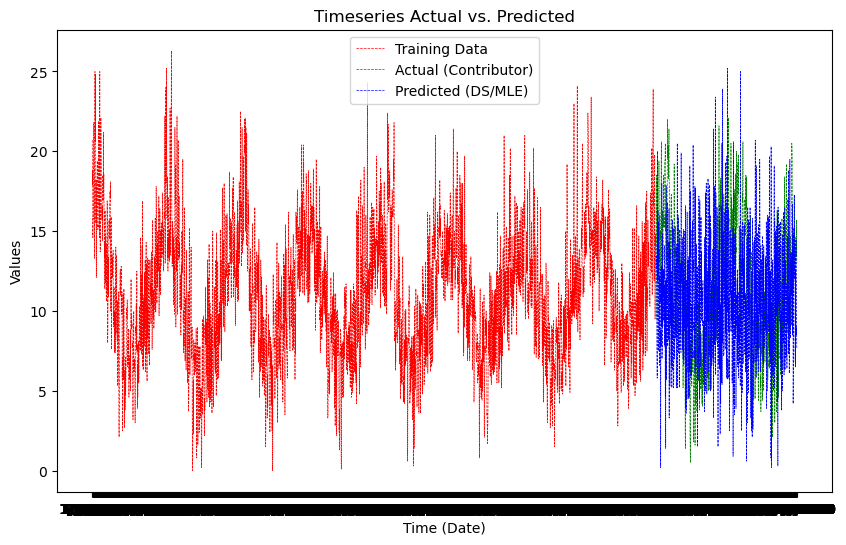

In [1]:
import pandas as pd
from Grapher import graphTS
data = pd.read_csv('test/set1/temp.csv')
data['Daily minimum temperatures'] = data['Daily minimum temperatures'].str.replace('[^\d.]+', '', regex=True).astype(float)
testsplit = 0.2
split = int(len(data) * (.8))
xtrain, xtest = data['Date'][:split], data['Date'][split:]
ytrain, ytest = data['Daily minimum temperatures'][:split], data['Daily minimum temperatures'][split:]
actual = data['Daily minimum temperatures'].values
predicted = data.sample(len(ytest), replace=True)['Daily minimum temperatures'].values
graphTS(xtrain=xtrain, xtest=xtest, ypred=predicted, ytrue=ytest, ytrain=ytrain, units='Date')

In [ ]:
import io
import matplotlib.pyplot as plt
from Grapher import graphTS
def my_view(request):
    # create a Matplotlib figure
    fig = graphTS()
    
    # save the figure to a binary file
    buf = io.BytesIO()
    fig.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    
    # return the binary data as a HttpResponse
    return HttpResponse(buf.read(), content_type='image/png')